In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

In [17]:
df = pd.read_csv('diabetes_data.csv')

In [18]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [19]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [22]:
def plot_feature_distribution(selected_feature):
    feature_data = df[selected_feature].dropna()
    plt.figure(figsize=(10, 6))
    
    color_map = sns.diverging_palette(270, 150, s=100, l=50, as_cmap=True)
    
    bin_counts, bin_edges = np.histogram(feature_data, bins=30)
    bar_widths = np.diff(bin_edges)
    
    for count, left_edge, width in zip(bin_counts, bin_edges[:-1], bar_widths):
        plt.bar(left_edge, count, width=width, color=color_map(left_edge / bin_edges.max()), edgecolor='black')
    
    plt.title(f'Распределение {selected_feature}')
    plt.xlabel(selected_feature)
    plt.ylabel('Частота')
    plt.show()

feature_selector_dropdown = widgets.Dropdown(options=df.columns, description='Признак:')

widgets.interact(plot_feature_distribution, selected_feature=feature_selector_dropdown);

interactive(children=(Dropdown(description='Признак:', options=('Age', 'Gender', 'Ethnicity', 'SocioeconomicSt…

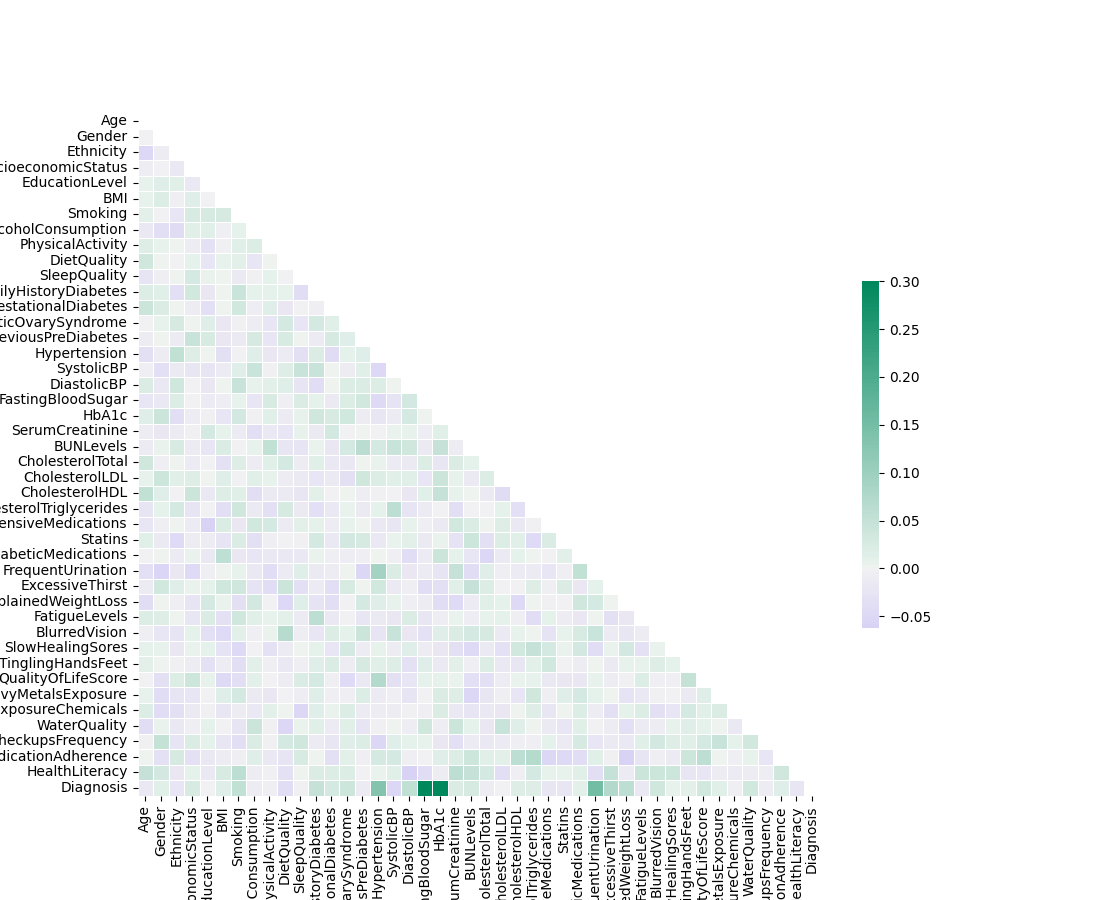

In [23]:
correlation_data = df.corr()

triangle_mask = np.triu(np.ones_like(correlation_data, dtype=bool))

figure, axis = plt.subplots(figsize=(11, 9))

color_scheme = sns.diverging_palette(270, 150, s=100, l=50, as_cmap=True)

sns.heatmap(correlation_data, mask=triangle_mask, cmap=color_scheme, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

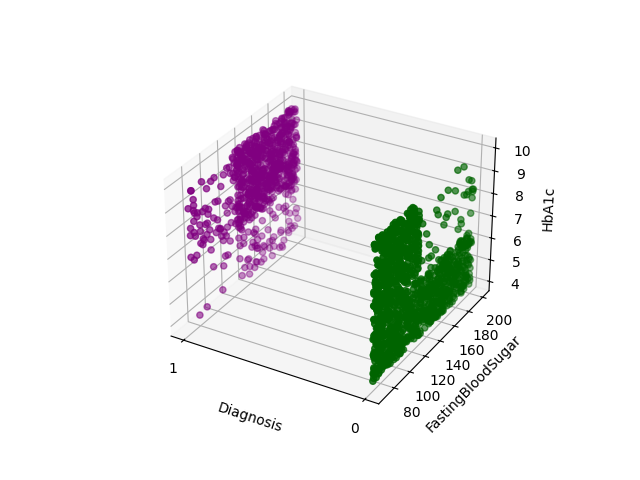

In [9]:
%matplotlib widget
data = df[['Diagnosis', 'FastingBloodSugar', 'HbA1c']]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('FastingBloodSugar')
ax.set_zlabel('HbA1c')
x = data['Diagnosis']
y = data['FastingBloodSugar']
z = data['HbA1c']
colors = ['darkgreen' if value == '0' else 'purple' for value in x]
ax.scatter(x, y, z, c=colors)
plt.show()